## Data Cleaning for healthcare-data-stroke.csv
This notebook cleans the data in `healthcare-data-stroke.csv` by removing duplicates, `NaN` values, re-scaling values of the data by normalization, and convert non-numerical data to numerical data for the ease of model training in future.

### Import `pandas` library and read csv file. Also list out some basic informations about the dataset. Remove records that has `NaN` values.

In [657]:
import pandas as pd
df = pd.read_csv('/Users/wenghong/ML-Assignment/healthcare-dataset-stroke-data.csv')

num_nan_rows = df.isna().sum(axis=1).astype(bool).sum()
total_rows = df.shape[0]
print('Number of records in total: {}\nNumber of records that has NaN values: {}'.format(total_rows, num_nan_rows))

# remove NaN values
df = df.dropna()
print('Number of records after removing NaN values: {}'.format(df.shape[0]))

Number of records in total: 5110
Number of records that has NaN values: 201
Number of records after removing NaN values: 4909


### Give an overview of the dataset

In [658]:
df.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


### List out all the columns

In [660]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### List out all the variety of values in each column

In [661]:
for col in df.columns:
    print("{}\n".format(col))
    print(df[col].unique())

id

[ 9046 31112 60182 ... 19723 37544 44679]
gender

['Male' 'Female' 'Other']
age

[6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.

In [662]:
print('Before drop `Other` in gender: {}'.format(df.shape[0]))

num_other_rows = (df['gender'] == 'Other').sum()
print(num_other_rows)

df.drop(df[df['gender'] == 'Other'].index, inplace=True)
print('After drop `Other` in gender: {}'.format(df.shape[0]))



Before drop `Other` in gender: 4909
1
After drop `Other` in gender: 4908


### Find the number of records that has 'Unknown' in `smoking_status` 

In [663]:
# drop records that has 'Unknown' in smoking_status
smoking_unknown_rows = df[df['smoking_status'] == 'Unknown'].shape[0]
print(smoking_unknown_rows)
print('Number of records before dropping record that has `Unknown` values: {}'.format(df.shape[0]))
df = df[~(df['smoking_status'] == 'Unknown')]
print('Number of records after dropping record that has `Unknown` values: {}'.format(df.shape[0]))

1483
Number of records before dropping record that has `Unknown` values: 4908
Number of records after dropping record that has `Unknown` values: 3425


### Convert non-numerical values to numerical

In [664]:

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['work_type'] = df['work_type'].map({'Never_worked': 0, 'Private': 1, 'Self-employed':2, 'Govt_job': 3, 'children': 4})
df['residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})
df['smoking_status'] = df['smoking_status'].map({'never smoked': 0, 'smokes': 1, 'formerly smoked': 2, 'Unknown': 3})
df = df.drop('Residence_type', axis=1)
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,residence_type
0,9046,1,67.0,0,1,1,1,228.69,36.6,2,1,1
2,31112,1,80.0,0,1,1,1,105.92,32.5,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,1,1
4,1665,0,79.0,1,0,1,2,174.12,24.0,0,1,0
5,56669,1,81.0,0,0,1,1,186.21,29.0,2,1,1
6,53882,1,74.0,1,1,1,1,70.09,27.4,0,1,0
7,10434,0,69.0,0,0,0,1,94.39,22.8,0,1,1
10,12109,0,81.0,1,0,1,1,80.43,29.7,0,1,0
11,12095,0,61.0,0,1,1,3,120.46,36.8,1,1,0
12,12175,0,54.0,0,0,1,1,104.51,27.3,1,1,1


In [665]:
print(df.shape[0])

3425


### Normalize data by converting the values to the scale of [0, 1]

In [666]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized.head(20)
# print(df_normalized.shape[0])



,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,residence_type
0,0.123052,1.0,0.791667,0.0,1.0,1.0,0.25,0.801265,0.311801,1.0,1.0,1.0
1,0.426027,1.0,0.972222,0.0,1.0,1.0,0.25,0.234512,0.260870,0.0,1.0,0.0
2,0.825171,0.0,0.541667,0.0,0.0,1.0,0.25,0.536008,0.284472,0.5,1.0,1.0
3,0.021708,0.0,0.958333,1.0,0.0,1.0,0.50,0.549349,0.155280,0.0,1.0,0.0
4,0.776936,1.0,0.986111,0.0,0.0,1.0,0.25,0.605161,0.217391,1.0,1.0,1.0
5,0.738669,1.0,0.888889,1.0,1.0,1.0,0.25,0.069107,0.197516,0.0,1.0,0.0
6,0.142110,0.0,0.819444,0.0,0.0,0.0,0.25,0.181285,0.140373,0.0,1.0,1.0
7,0.165108,0.0,0.986111,1.0,0.0,1.0,0.25,0.116841,0.226087,0.0,1.0,0.0
8,0.164916,0.0,0.708333,0.0,1.0,1.0,0.75,0.301634,0.314286,0.5,1.0,0.0
9,0.166014,0.0,0.611111,0.0,0.0,1.0,0.25,0.228003,0.196273,0.5,1.0,1.0


In [667]:
# nan_rows = (df[df.isna().any(axis=1)])
# num_nan_rows = nan_rows.sum()
# print(nan_rows)
# print(num_nan_rows)

stroke_num_rows = (df_normalized['stroke'] == 1).sum()
non_stroke_rows = (df_normalized['stroke'] == 0).sum()
print(stroke_num_rows)
print(non_stroke_rows)

180
3245


### Write to new CSV File

In [668]:
# new_id = df_normalized.pop('id')
# print(new_id)
# df_normalized.insert(0, 'id', id)
# df_normalized.head(20)
print('\nNumber of records in dataset after cleaning and pre-processing: {}'.format(df_normalized.shape[0]))




Number of records in dataset after cleaning and pre-processing: 3425


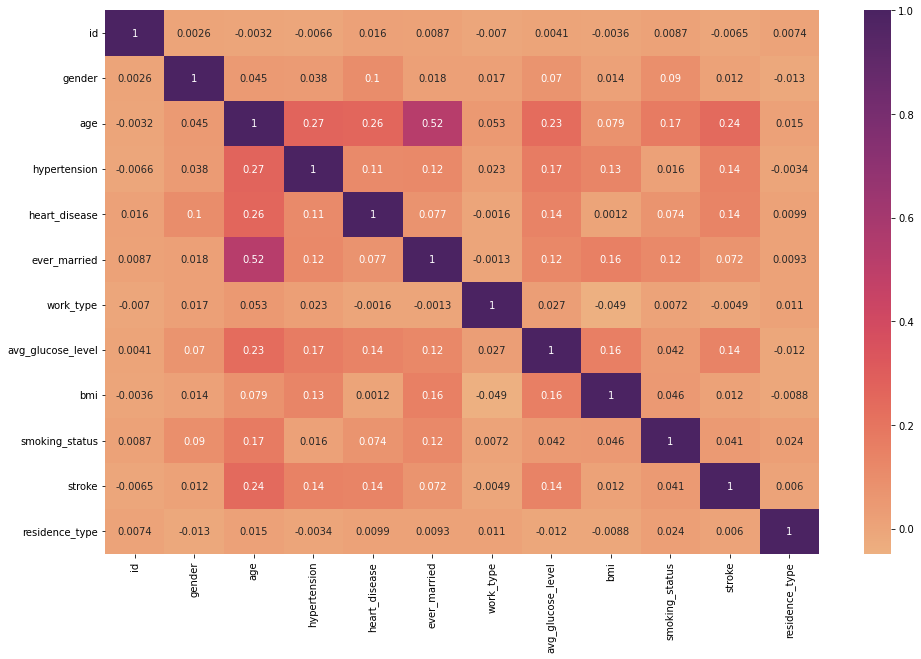

In [669]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_normalized.corr(), annot = True, cmap="flare")
plt.show()

## Implementing SVM into model

In [708]:
# separate features and target variable
X = df_normalized.drop(['stroke'], axis=1)
y = df_normalized['stroke']
print(X)

            id  gender       age  hypertension  heart_disease  ever_married  \
0     0.123052     1.0  0.791667           0.0            1.0           1.0   
1     0.426027     1.0  0.972222           0.0            1.0           1.0   
2     0.825171     0.0  0.541667           0.0            0.0           1.0   
3     0.021708     0.0  0.958333           1.0            0.0           1.0   
4     0.776936     1.0  0.986111           0.0            0.0           1.0   
...        ...     ...       ...           ...            ...           ...   
3420  0.937980     1.0  1.000000           1.0            0.0           1.0   
3421  0.616853     0.0  0.652778           0.0            0.0           1.0   
3422  0.614972     0.0  0.986111           0.0            0.0           1.0   
3423  0.269652     0.0  0.347222           0.0            0.0           1.0   
3424  0.514341     1.0  0.569444           0.0            0.0           1.0   

      work_type  avg_glucose_level       bmi  smoki

In [695]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Set up the SVM model
svm_model = SVC()


# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocess data (scale features using StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# implement SVM algorithm
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)
print(X)


            id  gender       age  hypertension  heart_disease  ever_married  \
0     0.123052     1.0  0.791667           0.0            1.0           1.0   
1     0.426027     1.0  0.972222           0.0            1.0           1.0   
2     0.825171     0.0  0.541667           0.0            0.0           1.0   
3     0.021708     0.0  0.958333           1.0            0.0           1.0   
4     0.776936     1.0  0.986111           0.0            0.0           1.0   
...        ...     ...       ...           ...            ...           ...   
3420  0.937980     1.0  1.000000           1.0            0.0           1.0   
3421  0.616853     0.0  0.652778           0.0            0.0           1.0   
3422  0.614972     0.0  0.986111           0.0            0.0           1.0   
3423  0.269652     0.0  0.347222           0.0            0.0           1.0   
3424  0.514341     1.0  0.569444           0.0            0.0           1.0   

      work_type  avg_glucose_level       bmi  smoki

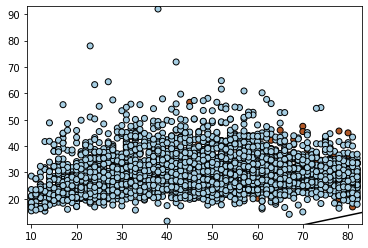

In [704]:
plt.scatter(X['age'], X['bmi'], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X['age'].min() - 1, X['age'].max() + 1, 10)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the decision boundary
plt.plot(xx, yy, 'k-')
plt.xlim(X['age'].min() - 1, X['age'].max() + 1)
plt.ylim(X['bmi'].min() - 1, X['bmi'].max() + 1)
plt.show()

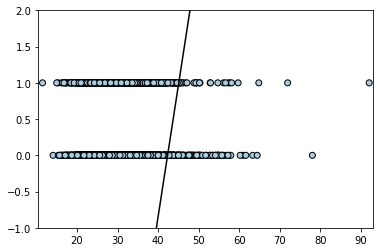

In [706]:
plt.scatter(X['bmi'], X['gender'], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X['bmi'].min() - 1, X['bmi'].max() + 1, 10)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the decision boundary
plt.plot(xx, yy, 'k-')
plt.xlim(X['bmi'].min() - 1, X['bmi'].max() + 1)
plt.ylim(X['gender'].min() - 1, X['gender'].max() + 1)
plt.show()

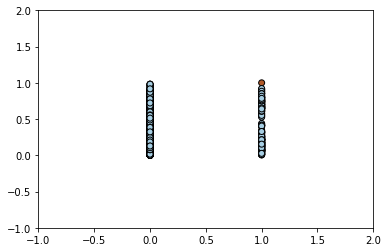

In [709]:
plt.scatter(X['heart_disease'], X['avg_glucose_level'], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X['heart_disease'].min() - 1, X['heart_disease'].max() + 1, 10)
yy = a * xx - (model.intercept_[0]) / w[1]
# Plot the decision boundary
plt.plot(xx, yy, 'k-')
plt.xlim(X['heart_disease'].min() - 1, X['heart_disease'].max() + 1)
plt.ylim(X['avg_glucose_level'].min() - 1, X['avg_glucose_level'].max() + 1)
plt.show()

## Model Evaluation

In [699]:
# evaluate model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9357664233576642
Confusion Matrix:
 [[641   0]
 [ 44   0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       641
         1.0       0.00      0.00      0.00        44

    accuracy                           0.94       685
   macro avg       0.47      0.50      0.48       685
weighted avg       0.88      0.94      0.90       685



/Users/wenghong/opt/anaconda3/envs/ds_env1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wenghong/opt/anaconda3/envs/ds_env1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wenghong/opt/anaconda3/envs/ds_env1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

The model's accuracy is 0.93, but the confusion matrix show that the False Positive and True Positive is 0. The model also shows error that indicates Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. One common reason is that the label is underrepresented or has very few instances in the training data. In such cases, the model may not have enough information to learn the characteristics of the label and may fail to predict any instances of that label in the test set.
To resolve this, we decided to implement weighted multi-class SVM algorithm that is more robust to imbalanced data by assigning the `class-weight = balanced`. The model is then being evaluated again.

In [700]:
model = SVC(kernel='linear', C=1.0, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.7211678832116788
Confusion Matrix:
 [[459 182]
 [  9  35]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.72      0.83       641
         1.0       0.16      0.80      0.27        44

    accuracy                           0.72       685
   macro avg       0.57      0.76      0.55       685
weighted avg       0.93      0.72      0.79       685



## Model Optimization (Hyper parameters Fine-tuning)

But now the accuracy score is 0.72 which has room for improvement, so we decided to optimize our model by fine-tuning our hyperparameters. We performed grid-search using cross-validation to find the best hyperparameters that works the best for our model.

In [701]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Define the hyperparameters to tune
hyperparameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_model, param_grid=hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model using cross-validation with the best hyperparameters
svm_model = SVC(**grid_search.best_params_)
scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validation Accuracy Scores: [0.95072993 0.95072993 0.95072993 0.95072993 0.94890511]
Mean Accuracy: 0.9503649635036495


It is shown that the best hyperparameters for our model would be: `{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}`. We replace all the hyperparameters into our model and evaluate our model again.

In [702]:
svm_model = SVC(C=0.1, kernel='linear', gamma='scale')

# Train the model on the full training set
svm_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the performance of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9357664233576642


## Visualization

In [ ]:
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
#
# # Get the separating hyperplane
# w = svm.coef_[0]
# a = -w[0] / w[1]
# xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 10)
# yy = a * xx - (svm.intercept_[0]) / w[1]
#
# # Plot the decision boundary
# plt.plot(xx, yy, 'k-')
# plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
# plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
# plt.show()

print(X[:])